<a href="https://colab.research.google.com/github/381706-1Mityagina/Computer_vision_labs/blob/lab2/conv2d_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image size:  torch.Size([588, 786, 3])


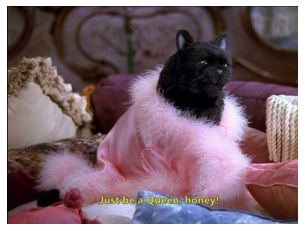

In [4]:
import torch, matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
matplotlib.rc('image', cmap = 'gray')

img_url = 'https://sun9-50.userapi.com/impf/c854320/v854320642/a825e/ui88KZy1j2A.jpg?size=786x588&quality=96&proxy=1&sign=00b7bbed0b620115a27d51db8d8dd7d6'
img = imageio.imread(img_url)

# Transform into pytorch tensor.
img = torch.tensor(img, dtype=torch.float) / 255.0  

# Show the image size.
print('Image size: ', img.shape)

# Plot the image.
def display_image(img):
  plt.figure(); plt.imshow(img)
  plt.grid(False);  plt.axis('off'); plt.show()
  
display_image(img)

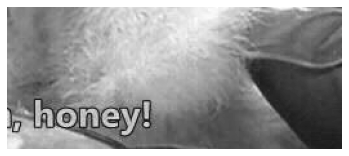

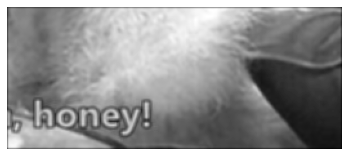

In [13]:
# The input is just a section of the red channel image.
gray_img = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3.0

# We will take the pixels between rows 440:550 and columns 460:720.
input_image = gray_img[440:550, 460:720]

# Or we will take the whole picture
# input_image = gray_img

# The 3x3 kernel
kv = 1.0 / 9.0
blur_weights = torch.Tensor([[kv, kv, kv],
                             [kv, kv, kv],
                             [kv, kv, kv]]
                            )

def SingleConvolution(input_image, kernel):
    import torch.nn.functional as F
    kernel = kernel.contiguous()
    output = F.conv2d(input_image.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), padding = 1)
    return output.squeeze()

def SingleConvolution3d(input_image, kernel):
    import torch.nn.functional as F
    kernel = kernel.contiguous()
    output = F.conv3d(input_image.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), padding = 1)
    return output.squeeze()

# Execute the convolution operation
output_image = SingleConvolution(input_image, blur_weights)

display_image(input_image)
display_image(output_image)

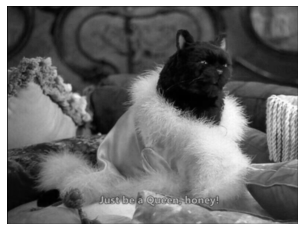

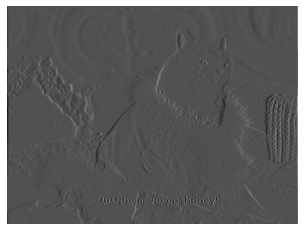

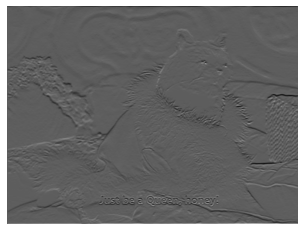

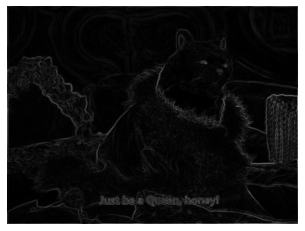

In [7]:
input_image = SingleConvolution(gray_img, blur_weights)

# The 3x3 kernel for the Sobel operator
weights = torch.tensor([[1.0, 0.0, -1.0],
                        [2.0, 0.0, -2.0],
                        [1.0, 0.0, -1.0]])

# Execute the convolution operation for the weights and transposed weights.
gradx = SingleConvolution(input_image, weights)
grady = SingleConvolution(input_image, weights.t())

# Gradient magnitude  = sqrt(gradx.^2 + grady.^2)
magnitude = torch.sqrt(gradx * gradx + grady * grady)

# Make sure the images are still between 0 and 1.
gradx = (gradx - gradx.min()).div(gradx.max() - gradx.min())
grady = (grady - grady.min()).div(grady.max() - grady.min())
magnitude = magnitude / magnitude.max()

display_image(input_image)
display_image(gradx)
display_image(grady)
display_image(magnitude)

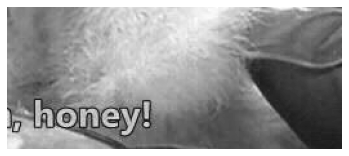

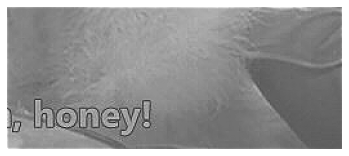

In [8]:
# The input is just a section of the red channel image.
gray_img = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3.0

# We will take the pixels between rows 440:550 and columns 460:720.
input_image = gray_img[440:550, 460:720]

# Or we will take the whole picture
# input_image = gray_img

# The 3x3 kernel
sharp_kernel = torch.tensor([[  0  , -.5 ,    0 ],
               [-.5 ,   3  , -.5 ],
               [  0  , -.5 ,    0 ]])

# Execute the convolution operation
output_image = SingleConvolution(input_image, sharp_kernel)

display_image(input_image)
display_image(output_image)

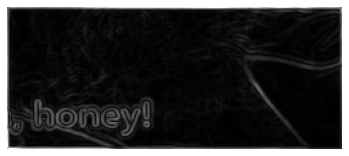

In [10]:
output_image = SingleConvolution(input_image, blur_weights) #Conv 1
output_image = SingleConvolution(output_image, sharp_kernel) #Conv 2
output_image = SingleConvolution(output_image, blur_weights) #Conv 3
gradx = SingleConvolution(output_image, weights) #Conv 4
grady = SingleConvolution(output_image, weights.t()) #Conv 5
magnitude = torch.sqrt(gradx * gradx + grady * grady)

# Make sure the images are still between 0 and 1.
gradx = (gradx - gradx.min()).div(gradx.max() - gradx.min())
grady = (grady - grady.min()).div(grady.max() - grady.min())
output_image = magnitude / magnitude.max()

display_image(output_image)